<a href="https://colab.research.google.com/github/anwishn/HoPy/blob/main/ch20_%EB%94%A5%EB%9F%AC%EB%8B%9D_%ED%8A%9C%EB%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

파이썬으로 배우는 딥러닝 교과서 ch20

# 20. 딥러닝 튜닝

## 20.1 하이퍼파라미터

**하이퍼파라미터** : 네트워크를 구성할 때 사람이 조정해야 하는 파라미터

=> 자동으로 최적화x, 적절하게 설정하지 않으면 올바르게 학습x => 새 모델 만들때 최적의 하이퍼파라미터 고려해야돼

## 20.2 네트워크 구조

네트워크 구조 = 은닉층 수, 은닉층의 유닛 수

자유롭게 설정 가능 -> 은닉층 수 및 은닉층의 유닛 수를 많게 하면 다양한 함수 표현 가능

* 은닉층 많아지면 => 입력층에 가까운 가중치를 적절하게 갱신하기 어렵다, 학습이 좀처럼 진행x

* 은닉층의 유닛 수가 많아지면 => 중요성이 낮은 특징량을 추출해 -> 과학습하기 쉬워

In [ ]:
# 네트워크 구조, 특히 은닉층 구조가 모델의 학습에 미치는 영향 확인하기
# A : 유닛 수 256개의 전결합 은닉층 하나, 유닛 수 128개의 전결합 은닉층 하나를 가진 모델
# B : 유닛 수 256개의 전결합 은닉층 하나, 유닛 수 128개의 전결합 은닉층 3개를 가진 모델
# C : 유닛 수 256개의 전결합 은닉층 하나, 유닛 수 1568개의 전결합 은닉층 하나를 가진 모델

import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Activation, Dense, Dropout
from keras.models import Sequential, load_model
from keras import optimizers
from keras.utils.np_utils import to_categorical
import tensorflow as tf

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)[:6000]
X_test = X_test.reshape(X_test.shape[0], 784)[:1000]
y_train = to_categorical(y_train)[:6000]
y_test = to_categorical(y_test)[:1000]

model = Sequential()
model.add(Dense(256, input_dim=784))
model.add(Activation("sigmoid"))

def funcA():
  model.add(Dense(128))
  model.add(Activation("sigmoid"))

def funcB():
  model.add(Dense(128))
  model.add(Activation("sigmoid"))
  model.add(Dense(128))
  model.add(Activation("sigmoid"))
  model.add(Dense(128))
  model.add(Activation("sigmoid"))

def funcC():
  model.add(Dense(1568))
  model.add(Activation("sigmoid"))

funcA()
funcB()
funcC()

model.add(Dropout(rate=0.5))
model.add(Dense(10))
model.add(Activation("softmax"))

sgd = tf.optimizers.SGD(lr=0.1)

model.compile(optimizer=sgd, loss="categorical_crossentropy", metrics =["accuracy"])

model.fit(X_train, y_train, batch_size=32, epochs=3, verbose=1)

score = model.evaluate(X_test, y_test, verbose=0)
print("evaluate loss: {0[0]}\nevaluate acc: {0[1]}".format(score))

11501568/11490434 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/3
188/188 [==============================] - 2s 8ms/step - loss: 4.4254 - accuracy: 0.1025
Epoch 2/3
188/188 [==============================] - 2s 12ms/step - loss: 2.4538 - accuracy: 0.1028
Epoch 3/3
188/188 [==============================] - 3s 14ms/step - loss: 2.3886 - accuracy: 0.1045
evaluate loss: 2.3511240482330322
evaluate acc: 0.10700000077486038


## 20.3 드롭아웃

**드롭아웃** : 과학습을 방지하여 모델의 정확도를 높이는 방법

* 유닛의 일부가 학습할 때마다 무작위로 제거 -> 보다 범용적인 특징 학습 -> 과학습 방지

```
model.add(Dropout(rate=0.5))  # rate : 제거할 유닛의 비율
```



## 20.4 활성화 함수

**활성화 함수** : 주로 전결합층 뒤에 적용하는 함수, 뉴런의 발화

* 비선형성을 갖게 해 -> 선형 분리 불가능한 모델도 분류 가능

### 20.4.1 시그모이드 함수

**시그모이드 함수(sigmoid function)** : 활성화 함수로 사용되는 함수

```
sigmoid(x) = 1 / (1+e^(-x))
```
* 출력은 반드시 구간 (0,1) 안에 들어가기 때문에 극단적인 출력값이 적다.

### 20.4.2 ReLU 함수

**ReLU 함수**(Rectified Linear Unit) : 활성화 함수로 자주 사용



```
ReLu(x) = 0(x<0), x(x>=0)
```

* 출력은 어떤 구간에도 수렴되지 않고, 극단적인 출력값이 생성될 가능성이 있다.

## 20.5 손실 함수

**손실 함수(오차 함수)** : 학습시 모델의 출력과 지도 데이터의 차이(잘못된 상태)를 평가하는 함수

* 제곱오차, 교차 엔트로피 오차 등이 사용
* 손실 함수를 최소화하도록 -> 오차역전파법 -> 각 층의 가중치 갱신


### 20.5.1 제곱오차

**제곱오차** : 최소제곱법으로 다양한 분야에서 사용되는 오차 함수



```
E = sigma((ti-yi)^2, i는 1부터 N까지)    # yi는 예측 라벨, ti는 정답 라벨
```

* 연속값 평가 뛰어나 => 회귀 모델의 오차 함수로 사용
* 최소치 부근에서 천천히 갱신되므로 학습이 수렴하기 쉽다.

### 20.5.2 교차 엔트로피 오차


**교차 엔트로피 오차(CEE)** : 이항 분류의 평가에 특화 => 분류 모델의 오차 함수로 사용



```
E = sigma(-ti*log(yi) - (1-ti)*log(1-yi), i는 1부터 N까지)   # |ti-yi|이 작을 때 0에 가까운 값 취해
```
* 예측라벨과 정답라벨의 값이 가까울수록 좋아 -> 0~1 사이에 있는 두 숫자의 차이를 평가하는 합리적인 함수


## 20.6 최적화 함수

**최적화 함수** : 다양한 요소를 감안하여 가중치 갱신 수행

* 각각의 최적화 함수에 따라 가중치 갱신 방법이 달라 -> 하이퍼파라미터의 일종

## 20.7 학습률

**학습률** : 각 층의 가중치를 한 번에 어느 정도 변경할지 결정하는 하이퍼파라미터

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Activation, Dense, Dropout
from keras.models import Sequential, load_model
from keras import optimizers
from keras.utils.np_utils import to_categorical
import tensorflow as tf

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)[:6000]
X_test = X_test.reshape(X_test.shape[0], 784)[:1000]
y_train = to_categorical(y_train)[:6000]
y_test = to_categorical(y_test)[:1000]

model = Sequential()
model.add(Dense(256, input_dim=784))
model.add(Activation("sigmoid"))
model.add(Dense(128))
model.add(Activation("sigmoid"))
model.add(Dropout(rate=0.5))
model.add(Dense(10))
model.add(Activation("softmax"))

def funcA():
  global lr
  lr = 0.01

def funcB():
  global lr
  lr = 0.1

def funcC():
  global lr
  lr = 1.0

funcA()
funcB()
funcC()

sgd = tf.optimizers.SGD(lr=0.1)

model.compile(optimizer=sgd, loss="categorical_crossentropy", metrics =["accuracy"])

model.fit(X_train, y_train, batch_size=32, epochs=3, verbose=1)

score = model.evaluate(X_test, y_test, verbose=0)
print("evaluate loss: {0[0]}\nevaluate acc: {0[1]}".format(score))

Epoch 1/3
188/188 [==============================] - 2s 4ms/step - loss: 1.7661 - accuracy: 0.4017
Epoch 2/3
188/188 [==============================] - 1s 4ms/step - loss: 1.0725 - accuracy: 0.6642
Epoch 3/3
188/188 [==============================] - 1s 4ms/step - loss: 0.8720 - accuracy: 0.7285
evaluate loss: 0.7277602553367615
evaluate acc: 0.7919999957084656


## 20.8 미니배치 학습

**배치 크기(batch size)** : 모델의 학습을 실시할 때 한 번에 전달하는 데이터 수, 하이퍼파라미터

>* 한 번에 여러 데이터를 전달했을 때 모델은 각 데이터의 손실과 손실 함수의 기울기를 구해 but 가중치 갱신은 구해진 기울기의 평균으로 한 번만 실시
>* 복수의 데이터 이용하여 가중치 갱신 -> 극단적으로 바뀐 데이터의 영향 덜 받아, 병렬 계산 가능 -> 계산 시간 단축 
>* BUT 극단적인 가중치의 갱신 발생x -> 손실 함수의 국소해에서 벗어나지 x

* 편향된 데이터 많을 때 = 배치 크기 크게 / 유사한 데이터 많을 때 = 배치 크기 작게

>* 온라인 학습(확률적 경사하강법) = 배치 크기를 1로 하는 방식
>* 배치 학습(경사하강법) = 배치 크기를 전체 데이터 수로 지정하는 방식
>* 미니배치 학습 = 이들의 중간이 되는 방식

## 20.9 반복 학습

**반복 학습** : 모델의 정확도를 높이기 위해서 동일한 훈련 데이터를 사용하여 여러 번 학습

* 학습할 획수 = epoch 수(하이퍼파라미터)
* epoch 수를 높인다고 해서 모델의 정확도 계속 오르는것x, 오히려 과학습

Epoch 1/10
188/188 [==============================] - 1s 5ms/step - loss: 1.3971 - accuracy: 0.6313 - val_loss: 0.9396 - val_accuracy: 0.7240
Epoch 2/10
188/188 [==============================] - 1s 4ms/step - loss: 0.7132 - accuracy: 0.8312 - val_loss: 0.7315 - val_accuracy: 0.7860
Epoch 3/10
188/188 [==============================] - 1s 5ms/step - loss: 0.5805 - accuracy: 0.8575 - val_loss: 0.6213 - val_accuracy: 0.8020
Epoch 4/10
188/188 [==============================] - 1s 4ms/step - loss: 0.5158 - accuracy: 0.8657 - val_loss: 0.6136 - val_accuracy: 0.8320
Epoch 5/10
188/188 [==============================] - 1s 5ms/step - loss: 0.5323 - accuracy: 0.8562 - val_loss: 0.6009 - val_accuracy: 0.8130
Epoch 6/10
188/188 [==============================] - 1s 4ms/step - loss: 0.5015 - accuracy: 0.8627 - val_loss: 0.6445 - val_accuracy: 0.7960
Epoch 7/10
188/188 [==============================] - 1s 5ms/step - loss: 0.5508 - accuracy: 0.8522 - val_loss: 0.5898 - val_accuracy: 0.8300
Epoch 

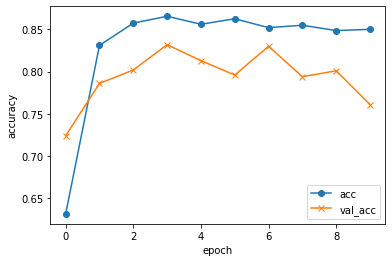

evaluate loss: 0.7020946145057678
evaluate acc: 0.7609999775886536


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Activation, Dense, Dropout
from keras.models import Sequential, load_model
from keras import optimizers
from keras.utils.np_utils import to_categorical
import tensorflow as tf

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)[:6000]
X_test = X_test.reshape(X_test.shape[0], 784)[:1000]
y_train = to_categorical(y_train)[:6000]
y_test = to_categorical(y_test)[:1000]

model = Sequential()
model.add(Dense(256, input_dim=784))
model.add(Activation("sigmoid"))
model.add(Dense(128))
model.add(Activation("sigmoid"))
model.add(Dense(10))
model.add(Activation("softmax"))

sgd = tf.optimizers.SGD(lr=0.1)

model.compile(optimizer=sgd, loss="categorical_crossentropy", metrics =["accuracy"])

def funcA():
  global epochs
  epochs = 5

def funcB():
  global epochs
  epochs = 10

def funcC():
  global epochs
  epochs = 60

#funcA()
funcB()
#funcC()


history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, verbose=1, validation_data=(X_test, y_test))
plt.plot(history.history["accuracy"], label="acc", ls="-", marker="o")
plt.plot(history.history["val_accuracy"], label="val_acc", ls="-", marker="x")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(loc="best")
plt.show()

score = model.evaluate(X_test, y_test, verbose=0)
print("evaluate loss: {0[0]}\nevaluate acc: {0[1]}".format(score))